# House Prices: Advanced Regression Techniques - Kaggle Challenge

## Introduction
In this notebook, we aim to solve the Kaggle challenge: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation). The goal of this competition is to predict the final prices of homes based on various features describing the properties.

![](https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png)

## Dataset Information
The dataset consists of a training set and a test set. The training set includes the SalePrice for each house, while the test set omits this value. We will use the training data to train our model and make predictions on the test data.

## Objectives
1. Preprocess the data: Handle missing values, encode categorical variables, and normalize/standardize numerical variables.
2. Train and evaluate multiple regression models: RandomForest, XGBoost, SVC, and Linear Regression.
3. Tune hyperparameters to find the best model.
4. Make predictions on the test set and save the results.

## Dependencies
This notebook requires the following libraries:
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn
- xgboost

## Instructions
1. Ensure you have all the required libraries installed.
2. Download the dataset from the Kaggle competition page and place the `train.csv` and `test.csv` files in the appropriate directory.
3. Run the cells in the notebook sequentially to reproduce the results.


# Get Data

In [3]:
!wget -O 'train.csv' 'https://drive.usercontent.google.com/download?id=1U4vlNJWavNO1Itrk4NBohkZBTGSSAwpb&export=download&authuser=0&confirm=t&uuid=642b11fd-74b6-4f1d-ba10-e9771cffadf0&at=APZUnTWLoBBUobckCR3H8mutb9Og:1716188147244'
!wget -O 'test.csv' 'https://drive.usercontent.google.com/download?id=1xIvFFq29775oRqzP4Q6d1IrATsv4jqD9&export=download&authuser=0&confirm=t&uuid=642b11fd-74b6-4f1d-ba10-e9771cffadf0&at=APZUnTWLoBBUobckCR3H8mutb9Og:1716188147244'


--2024-05-20 11:57:43--  https://drive.usercontent.google.com/download?id=1U4vlNJWavNO1Itrk4NBohkZBTGSSAwpb&export=download&authuser=0&confirm=t&uuid=642b11fd-74b6-4f1d-ba10-e9771cffadf0&at=APZUnTWLoBBUobckCR3H8mutb9Og:1716188147244
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.206.132, 2607:f8b0:4001:c62::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.206.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [application/octet-stream]
Saving to: ‘train.csv’

train.csv           100%[===================>] 449.88K  --.-KB/s    in 0.01s   

2024-05-20 11:57:44 (45.3 MB/s) - ‘train.csv’ saved [460676/460676]

--2024-05-20 11:57:44--  https://drive.usercontent.google.com/download?id=1xIvFFq29775oRqzP4Q6d1IrATsv4jqD9&export=download&authuser=0&confirm=t&uuid=642b11fd-74b6-4f1d-ba10-e9771cffadf0&at=APZUnTWLoBBUobckCR3H8mutb9Og:1716188147244
Resolving drive.usercontent.google.com (dr

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


# Load training datase

In [5]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Figure size 900x2500 with 0 Axes>

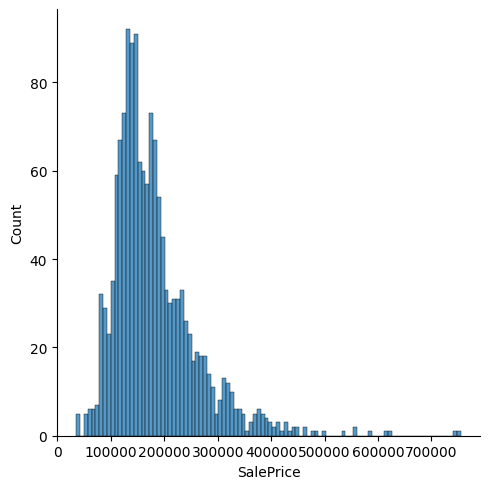

In [18]:
plt.figure(figsize=(9, 25))
sns.displot(df['SalePrice'], bins=100);

In [ ]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']


categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns


# Preprocessing

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model

In [80]:

models = {
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'SVC': SVR(),
    'LinearRegression': LinearRegression()
}


param_grids = {
    'RandomForest': {
        'model__n_estimators': [100, 200],
        'model__max_features': ['auto', 'sqrt', 'log2']
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1]
    },
    'SVC': {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'poly', 'rbf']
    },
    'LinearRegression': {
        'model__fit_intercept': [True, False]
    }
}

#GridSearchCV
best_model = None
best_rmse = float('inf')
best_params = None

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)

    if grid_search.best_score_ < best_rmse:
        best_rmse = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

print(f'Best Model: {best_model}')
print(f'Best Parameters: {best_params}')
print(f'Best RMSE: {-best_rmse ** 0.5}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrS...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'Gar

<ipython-input-80-05216cb730c5>:76: RuntimeWarning: invalid value encountered in scalar power
  print(f'Best RMSE: {-best_rmse ** 0.5}')


Predictions saved to result.csv


# Load test dataset

In [ ]:
test_df = pd.read_csv('test.csv')

predictions = best_model.predict(test_df)

In [83]:
output = pd.DataFrame({'Id': test_df.Id,
                       'SalePrice': predictions})


output.to_csv('result.csv',index=False)